In [23]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy

In [32]:
# establish equations to reproduce plots from paper
K1, k3, k4, p, d, c, Fmax, S, x = sy.symbols("K1, k3, k4, p, d, c, Fmax, S, x")

# establish variables
Fmax = 1
k4 = 100 / 150
p = 8.3e-5
d = .002
c = p / d    # I feel like this one should somehow depend on p and d, but not sure exactly how

Fe = (K1 * (c * Fmax + p / k4)) / (K1 + 1 + x)
Fi = (c * Fmax + p / k4) / (K1 + 1 + x)
Fa = (x * c * Fmax - p * (K1 + 1) / k4) / (K1 + 1 + x)

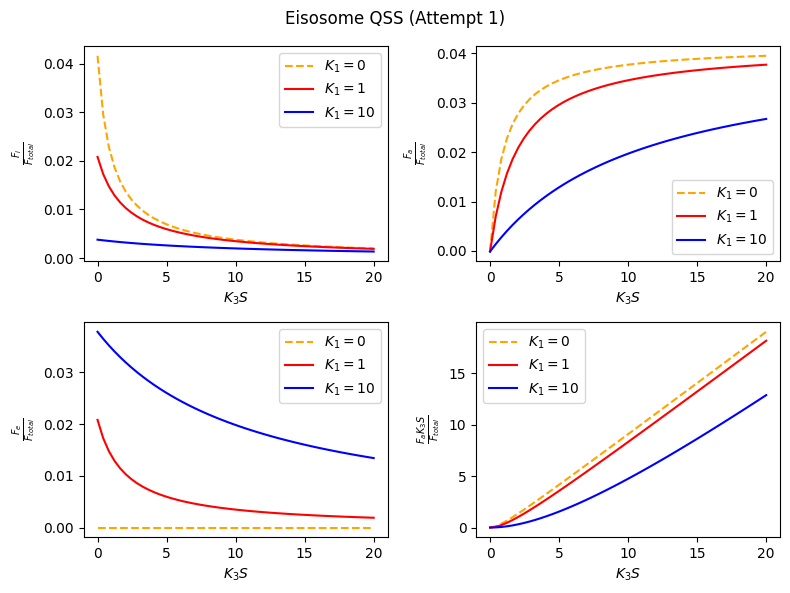

In [33]:
# 4 plots, each with K1 = 0, K1 = 1, K1 = 10
Fi_eq = sy.lambdify((x, K1), Fi)
Fe_eq = sy.lambdify((x, K1), Fe)
Fa_eq = sy.lambdify((x, K1), Fa)
FaK3S_eq = sy.lambdify((x, K1), (Fa * x) / (c * Fmax))

xrange = np.linspace(0, 20, 50)

# plot them
fig = plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot(xrange, Fi_eq(xrange, 0), linestyle='--', color='orange', label="$K_1=0$")
plt.plot(xrange, Fi_eq(xrange, 1), color='r', label="$K_1=1$")
plt.plot(xrange, Fi_eq(xrange, 10), color='b', label="$K_1=10$")
plt.ylabel(r"$\frac{F_i}{F_{total}}$")
plt.xlabel("$K_3S$")
plt.legend()

plt.subplot(222)
plt.plot(xrange, Fa_eq(xrange, 0), linestyle='--', color='orange', label="$K_1=0$")
plt.plot(xrange, Fa_eq(xrange, 1), color='r', label="$K_1=1$")
plt.plot(xrange, Fa_eq(xrange, 10), color='b', label="$K_1=10$")
plt.ylabel(r"$\frac{F_a}{F_{total}}$")
plt.xlabel("$K_3S$")
plt.legend()

plt.subplot(223)
plt.plot(xrange, Fe_eq(xrange, 0), linestyle='--', color='orange', label="$K_1=0$")
plt.plot(xrange, Fe_eq(xrange, 1), color='r', label="$K_1=1$")
plt.plot(xrange, Fe_eq(xrange, 10), color='b', label="$K_1=10$")
plt.ylabel(r"$\frac{F_e}{F_{total}}$")
plt.xlabel("$K_3S$")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(xrange, FaK3S_eq(xrange, 0), linestyle='--', color='orange', label="$K_1=0$")
plt.plot(xrange, FaK3S_eq(xrange, 1), color='r', label="$K_1=1$")
plt.plot(xrange, FaK3S_eq(xrange, 10), color='b', label="$K_1=10$")
plt.ylabel(r"$\frac{F_aK_3S}{F_{total}}$")
plt.xlabel("$K_3S$")
plt.legend()

plt.suptitle("Eisosome QSS (Attempt 1)")
plt.tight_layout()
# plt.savefig("Images/eisosome/quasi_steady_state_attempt1_scaled.png")
plt.show()